In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",header=None)
data.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary-class']
nation = data['native-country']
nationCount = nation.value_counts()
married = data['marital-status']
marriedCount = married.value_counts()
label = data['salary-class']
labelCount = label.value_counts()

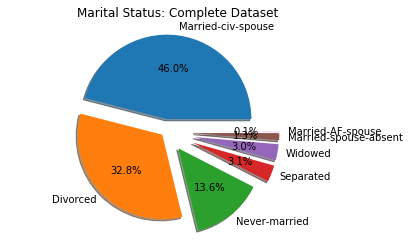

In [5]:
import matplotlib.pyplot as plt

#Plotting complete dataset
labels = 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'
sizes = [marriedCount[0],marriedCount[1],marriedCount[2],marriedCount[3],marriedCount[4],marriedCount[5],
          marriedCount[6]]
explode = (0.15, 0.05, 0.25, 0.35, 0.35, 0.35, 0.35)  # explode 1st slice
 
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)

plt.title('Marital Status: Complete Dataset')
plt.axis('equal')
plt.show()

c:\users\andrew\miniconda2\lib\site-packages\matplotlib\legend.py:1364: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


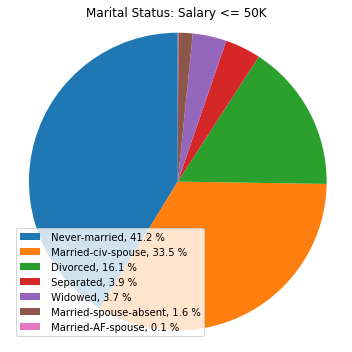

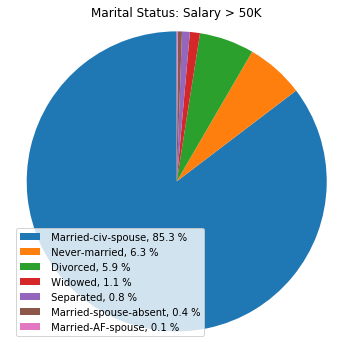

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

#Plot with regards to salary ==> <=$50K, >$50K
marriedBelow = list()
marriedAbove = list()
for idx, x in enumerate(married):
    if label[idx].strip() == '<=50K':
        marriedBelow.append(x)
    else:
        marriedAbove.append(x)

marriedBelowCount = Counter(marriedBelow).most_common()
marriedAboveCount = Counter(marriedAbove).most_common()


labels1 = [item for item, _ in marriedBelowCount]
sizes1 = [count for _ , count in marriedBelowCount]
labels2 = [item for item, _ in marriedAboveCount]
sizes2 = [count for _ , count in marriedAboveCount]
#explode1 = (0.15, 0.05, 0.25, 0.35, 0.35, 0.35, 0.35)  
#explode2 = (0.15, 0.45, 0.55, 0.75, 0.75, 0.75, 0.75)  
plt.figure(figsize=(5,5))
#plt.pie(sizes1, explode=explode1, labels=labels1, autopct='%1.1f%%', shadow=True, startangle=0)
patches, texts = plt.pie(sizes1, startangle=90)
plt.legend(patches, loc="lower left", labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels1, map(lambda x: float(x*100)/sum(sizes1), sizes1))])
plt.title('Marital Status: Salary <= 50K')
plt.tight_layout()
plt.axis('equal')
plt.savefig('MaritalBelowPie.png')
plt.show()

plt.figure(figsize=(5,5))
#plt.pie(sizes2, explode=explode2, labels=labels2, autopct='%1.1f%%', shadow=True, startangle=0)
patches, texts = plt.pie(sizes2, startangle=90)
plt.legend(patches, loc="lower left", labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels2, map(lambda x: float(x*100)/sum(sizes2), sizes2))])
plt.title('Marital Status: Salary > 50K')
plt.tight_layout()
plt.axis('equal')
plt.savefig('MaritalAbovePie.png')
plt.show()

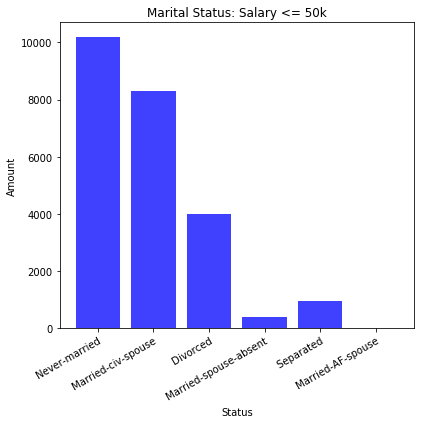

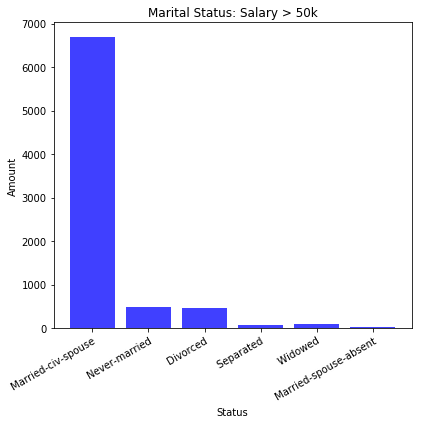

In [6]:
plt.figure(figsize=(6,6))
plt.hist(marriedBelow,facecolor='blue',alpha=0.75,rwidth=0.8,bins = np.arange(len(labels))-0.5)
plt.title('Marital Status: Salary <= 50k')
plt.xlabel('Status')
plt.xticks(rotation=30,rotation_mode="anchor",ha="right")
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig('MaritalBelow.png')
plt.show()

plt.figure(figsize=(6,6))
plt.hist(marriedAbove,facecolor='blue',alpha=0.75,rwidth=0.8,bins = np.arange(len(labels))-0.5)
plt.title('Marital Status: Salary > 50k')
plt.xlabel('Status')
plt.xticks(rotation=30,rotation_mode="anchor",ha="right")
plt.ylabel('Amount')
plt.tight_layout()
plt.savefig('MaritalAbove.png')
plt.show()